In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('Computer Hardware.csv')

In [3]:
df.head()

,Seller Name,Model Name,Machine Cycle Time in nanoseconds,Minimum Main Memory in Kilobytes,Maximum Main Memory in kilobytes,Cache Memory in Kilobytes,Minimum Channels in Units,Maximum Channels in Units,Published Relative Performance,Estimated Relative Performance
0,amdahl,470v/7,29,8000,32000,32,8,32,269,253
1,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
2,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
3,amdahl,470v/7c,29,8000,16000,32,8,16,132,132
4,amdahl,470v/b,26,8000,32000,64,8,32,318,290


In [4]:
miss = df.isnull().sum()

In [5]:
miss

Seller Name                          0
Model Name                           0
Machine Cycle Time in nanoseconds    0
Minimum Main Memory in Kilobytes     0
Maximum Main Memory in kilobytes     0
Cache Memory in Kilobytes            0
Minimum Channels in Units            0
Maximum Channels in Units            0
Published Relative Performance       0
Estimated Relative Performance       0
dtype: int64

In [6]:
df = df.drop(columns=['Model Name'], )

In [7]:
df = df.drop(columns=['Seller Name'])

In [8]:
df.head()

,Machine Cycle Time in nanoseconds,Minimum Main Memory in Kilobytes,Maximum Main Memory in kilobytes,Cache Memory in Kilobytes,Minimum Channels in Units,Maximum Channels in Units,Published Relative Performance,Estimated Relative Performance
0,29,8000,32000,32,8,32,269,253
1,29,8000,32000,32,8,32,220,253
2,29,8000,32000,32,8,32,172,253
3,29,8000,16000,32,8,16,132,132
4,26,8000,32000,64,8,32,318,290


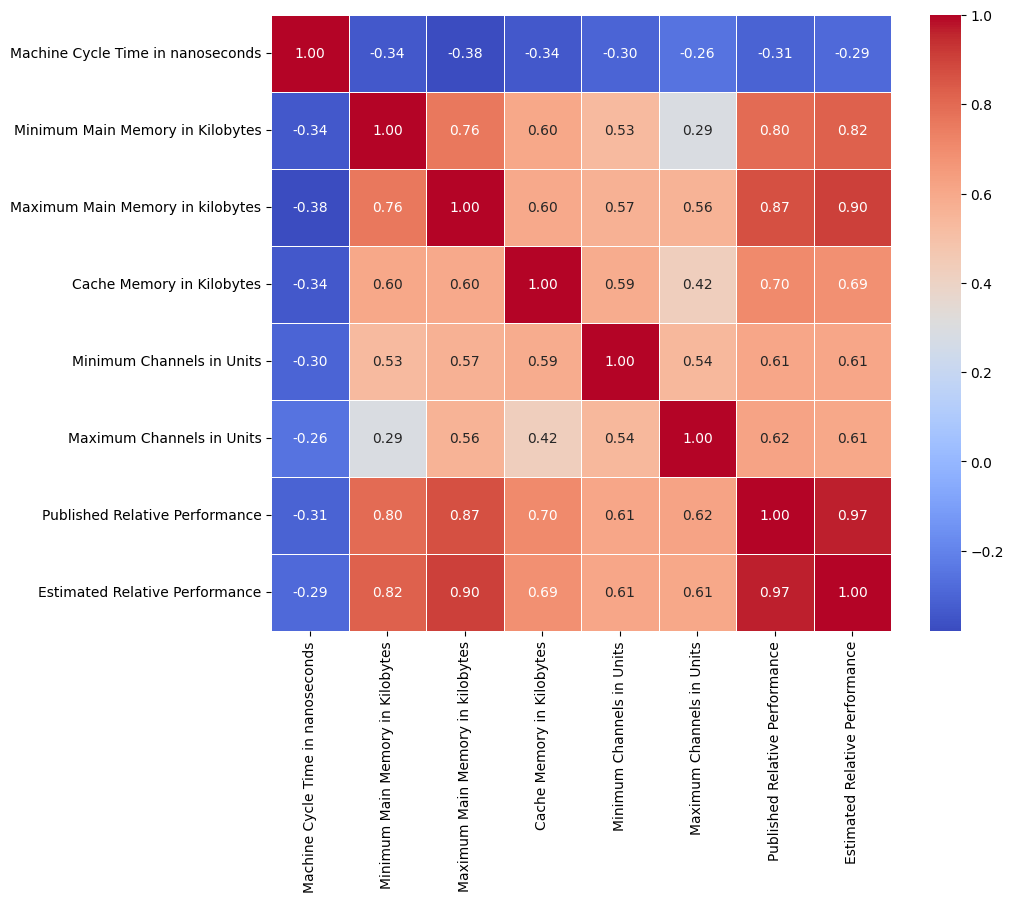

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.show()

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import warnings

warnings.filterwarnings('ignore', category=UserWarning)

In [12]:
X = df.drop(columns=['Estimated Relative Performance'])
y = df['Estimated Relative Performance']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("mean squared error: ", mse)
print(" r2_score:", r2)

new = [[30, 4096, 16384, 256, 4, 16, 200]] 
predicted = model.predict(new)
print("Predicted Estimated Relative Performance:", predicted)

mean squared error:  2744.4328250975236
 r2_score: 0.9056469722537928
Predicted Estimated Relative Performance: [91.84505819]


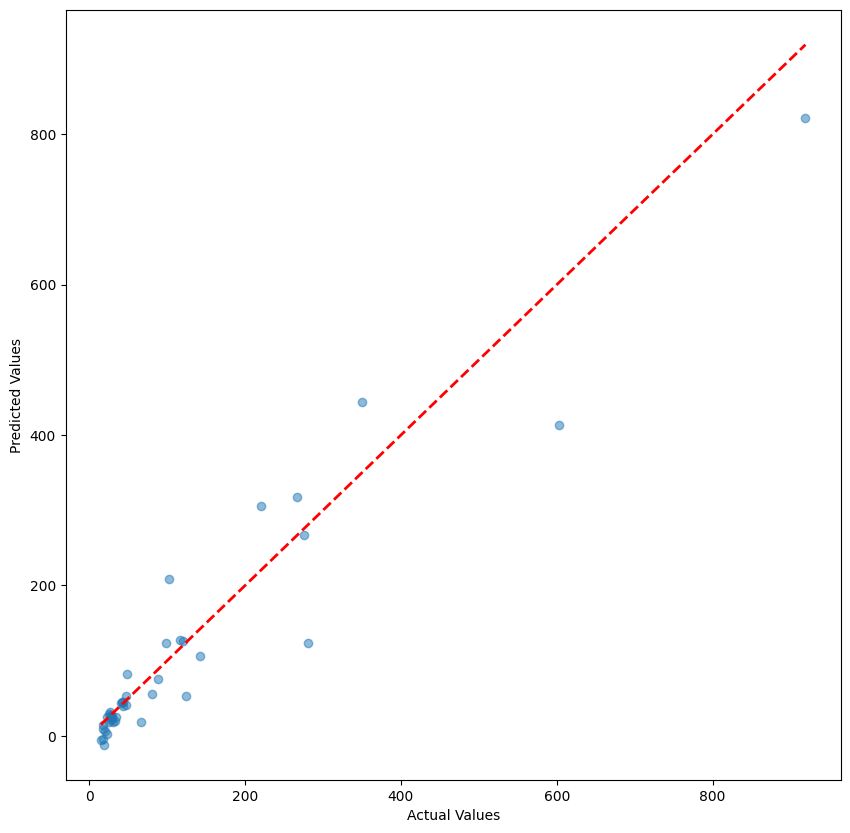

In [14]:
plt.figure(figsize=(10, 10))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()